In [1]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def view(img):
    plt.figure(figsize=(20, 20))
    plt.imshow(img, cmap='gray')

def cv_binarization(gray_img, threshold = 100):
    binarized = 1.0 * (gray_img > threshold)
    return binarized

def cv_opening(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.erode(img, kernel, iter_erosion)
    img = cv2.dilate(img, kernel, iter_dilatation)
    return img

def cv_closing(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.dilate(img, kernel, iter_dilatation)
    img = cv2.erode(img, kernel, iter_erosion)
    return img

def kernel(n):
    kernel  = np.ones((n, n),np.uint8)
    return kernel

def kernel2(n, m):
    kernel  = np.ones((n, m),np.uint8)
    return kernel

In [3]:
img    = cv2.imread('./image/table5.png', 0)
result = img.copy()
binary = cv_binarization(result, threshold=100)

In [4]:
opening = cv_opening(binary, kernel(13))
closing = cv_closing(opening, kernel(13))

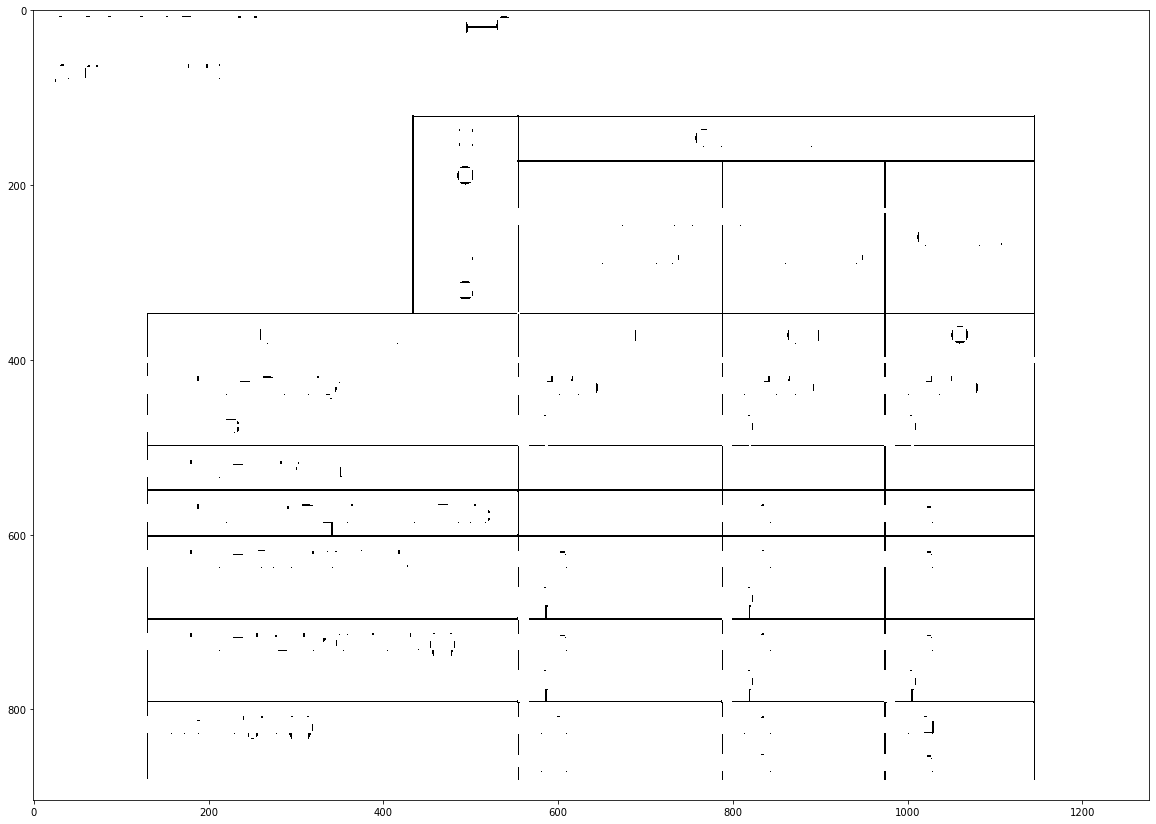

In [5]:
b01 = opening - closing
b02 = cv_closing(b01, kernel(5))
d1  = (b01 - b02)
b03 = cv_closing(d1, kernel(3))
d2  = d1 - b03
view(d2)

### Второй способ решения 

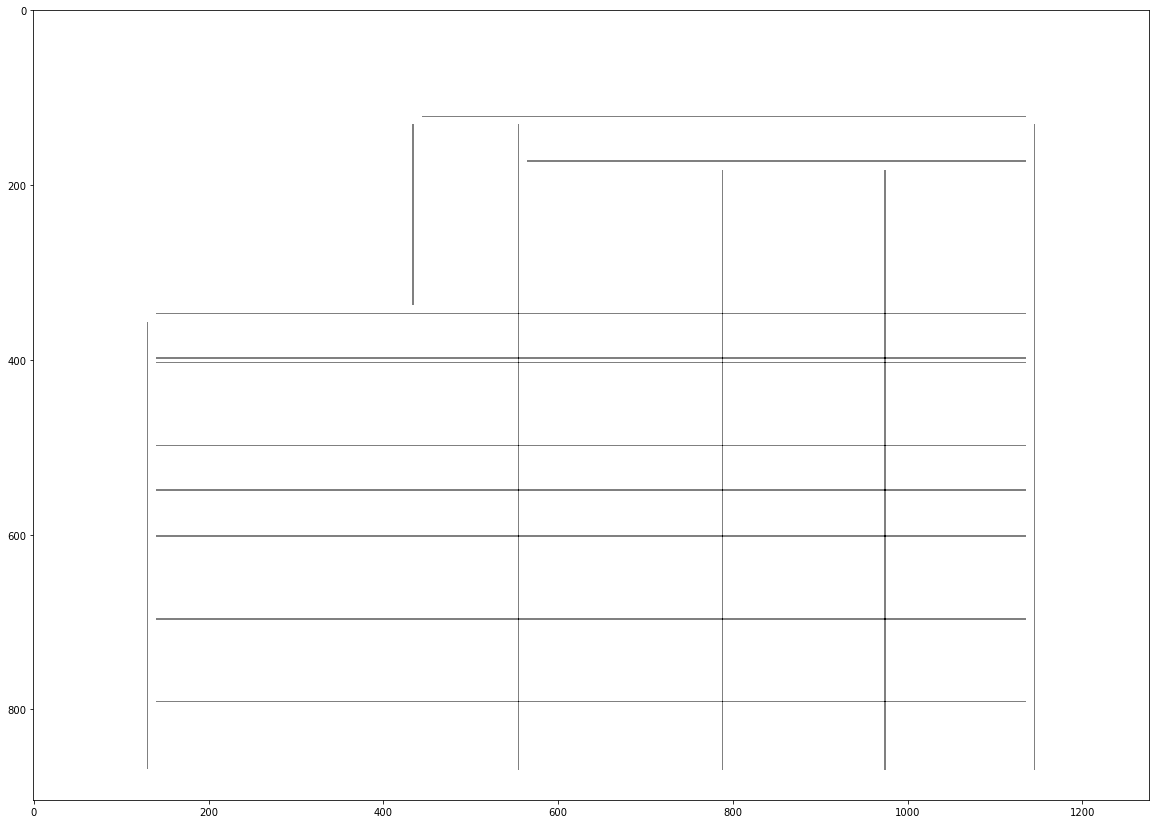

In [6]:
d1 = binary
d2 = cv2.dilate(d1, kernel2(1, 23))
d3 = cv2.dilate(d1, kernel2(23, 1))
d4 = d2 + d3
view(d4)

### Третий способ 

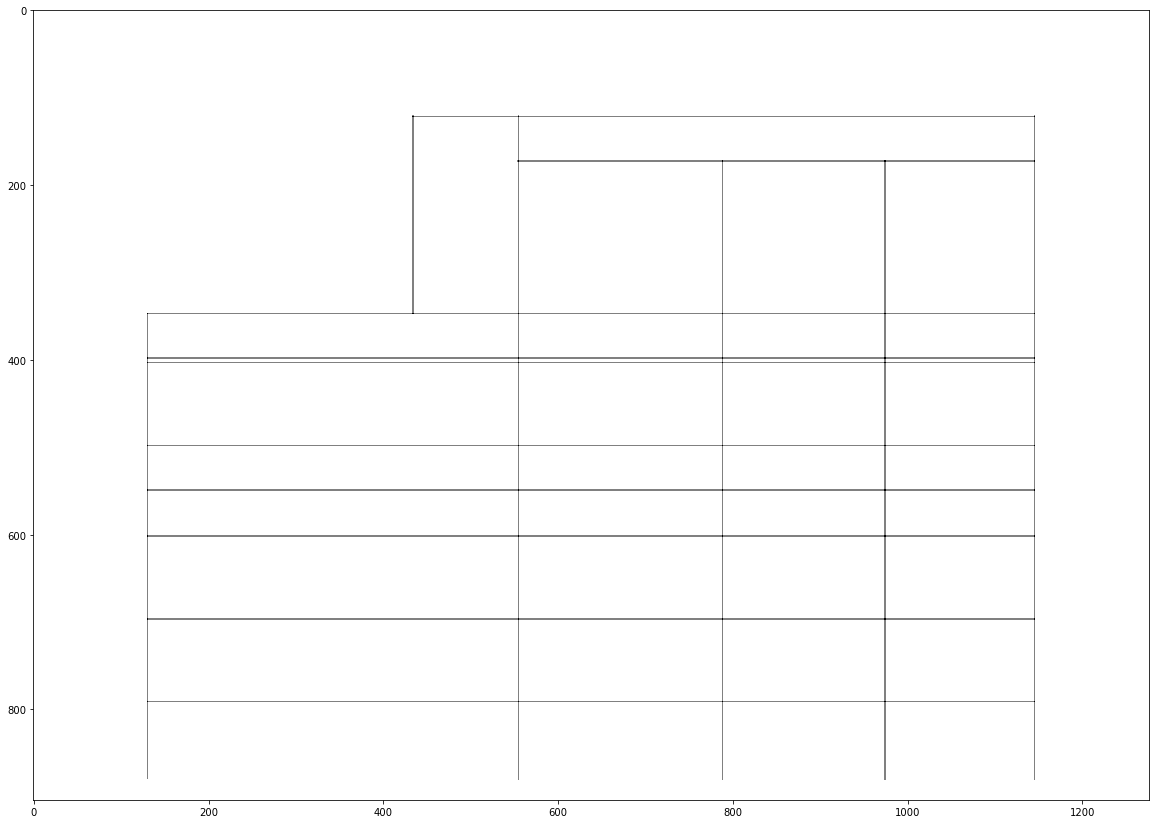

In [7]:
k1 = binary
k2 = cv_closing(k1, kernel2(1, 31))
k3 = cv_closing(k1, kernel2(31, 1))
k4 = k3 + k2
view(k4)

### Четвертый способ

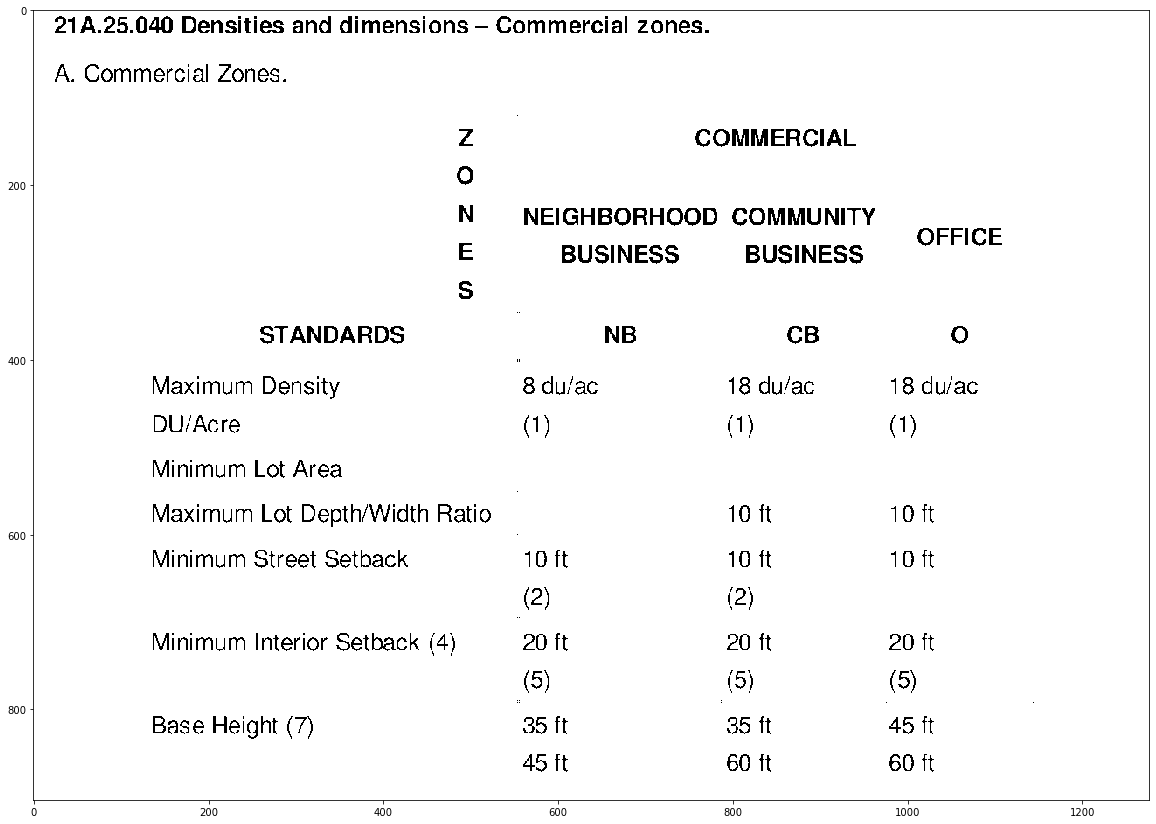

In [8]:
k5 = cv_binarization(k4, 1)
view(binary - k5)